In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import keras
from keras.datasets.mnist import load_data

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

* Splitting Training and Testing Dataset

In [2]:
(train_digits, train_labels), (test_digits, test_labels)=load_data(path='mnist.npz')

In [3]:
train_digits[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
train_digits.shape

(60000, 28, 28)

In [5]:
test_digits.shape

(10000, 28, 28)

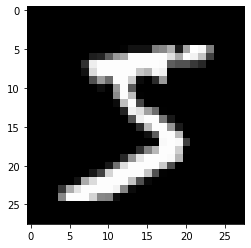

In [9]:
# matplotlib imshow - images
plt.imshow(train_digits[0],cmap='gray')
plt.show()

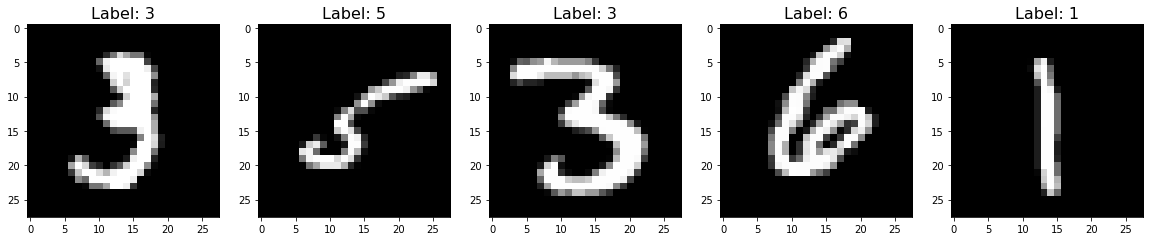

In [10]:
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(train_digits[10:15], train_labels[10:15])):
  # 1= rows & 5 = columns 
  plt.subplot(1, 5, index+1)
  plt.imshow(np.reshape(image, (28,28)), cmap='gray')
  plt.title("Label: %i" %label, fontsize=16)

* Input Shape of Image

In [11]:
train_digits.shape

(60000, 28, 28)

In [13]:
# Reshaping the image matrix from 28x28x1

image_height=train_digits.shape[1]
image_width=train_digits.shape[2]

# Dimentionality of grayscale image=1
num_channels=1

train_data=np.reshape(train_digits, (train_digits.shape[0], image_height, image_width, num_channels))

In [15]:
train_data.shape

(60000, 28, 28, 1)

In [16]:
test_data=np.reshape(test_digits, (test_digits.shape[0], image_height, image_width, num_channels))

In [17]:
test_data.shape

(10000, 28, 28, 1)

In [18]:
train_labels[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [19]:
# One hot Encoding
# # - [1,2,3,4,5,6,7,8,9,10]
# 5 - [0,0,0,0,1,0,0,0,0,0]
# 0 - [0,0,0,0,0,0,0,0,0,0]
# 6 - [0,0,0,0,0,1,0,0,0,0]

from keras.utils import to_categorical
num_classes=10

train_labels_cat=to_categorical(train_labels, num_classes)

In [42]:
test_labels_cat=to_categorical(test_labels, num_classes)

In [20]:
train_labels_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [21]:
train_labels_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

# Image Normalization

In [23]:
train_data=train_data.astype('float32')/255
test_data=test_data.astype('float32')/255

In [25]:
from sklearn.model_selection import train_test_split
train_data2, val_data , train_labels2, val_label = train_test_split(train_data, train_labels_cat, test_size = 0.1)

In [26]:
train_data2.shape

(54000, 28, 28, 1)

In [27]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [34]:
def build_model ():
  model = Sequential()
  # Convolutional + ReLU
  model.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same', 
                   input_shape = (image_height, image_width, num_channels)))
  model.add(MaxPooling2D(pool_size=(2,2)))

  # Convolutional + ReLU
  model.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  # Convolutional + ReLU
  model.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  # Flatten the Matrix
  model.add(Flatten())
  
  ## Fully Connected Layer
  model.add(Dense(units= 128, activation='relu'))
  ## Output Layer
  model.add(Dense(num_classes, activation="softmax"))

  model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

  return model
  

In [35]:
model=build_model()

Instructions for updating:
Colocations handled automatically by placer.


In [36]:
model = build_model()

In [37]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)              

In [38]:
history = model.fit (train_data2, train_labels2, epochs= 11, batch_size=64, validation_data=(val_data, val_label))

Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/11
54000/54000 [==============================] - 60s 1ms/step - loss: 0.8293 - accuracy: 0.7125 - val_loss: 0.2854 - val_accuracy: 0.9080
Epoch 2/11
54000/54000 [==============================] - 59s 1ms/step - loss: 0.2166 - accuracy: 0.9319 - val_loss: 0.1574 - val_accuracy: 0.9520
Epoch 3/11
54000/54000 [==============================] - 59s 1ms/step - loss: 0.1406 - accuracy: 0.9561 - val_loss: 0.1507 - val_accuracy: 0.9502
Epoch 4/11
54000/54000 [==============================] - 61s 1ms/step - loss: 0.1110 - accuracy: 0.9650 - val_loss: 0.0930 - val_accuracy: 0.9705
Epoch 5/11
54000/54000 [==============================] - 60s 1ms/step - loss: 0.0941 - accuracy: 0.9711 - val_loss: 0.0982 - val_accuracy: 0.9682
Epoch 6/11
54000/54000 [==============================] - 61s 1ms/step - loss: 0.0819 - accuracy: 0.9748 - val_loss: 0.0901 - val_accuracy: 0.9713
Epoch 7/11
54000/5400

In [44]:
import pandas as pd
history = pd.DataFrame(history.history)


In [45]:
history

,val_loss,val_accuracy,loss,accuracy
0,0.285353,0.908000,0.829329,0.712519
1,0.157391,0.952000,0.216648,0.931926
2,0.150740,0.950167,0.140609,0.956148
3,0.093049,0.970500,0.111029,0.964963
4,0.098178,0.968167,0.094122,0.971148
5,0.090083,0.971333,0.081944,0.974778
6,0.074184,0.976833,0.075417,0.976778
7,0.080490,0.973167,0.067083,0.978852
8,0.065990,0.980000,0.060133,0.981000
9,0.067468,0.978167,0.056465,0.982815


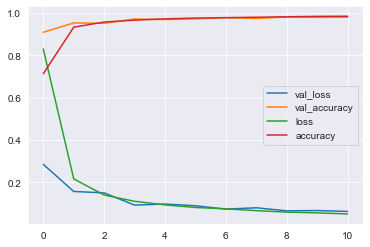

In [46]:
import seaborn as sns
sns.set_style('darkgrid')
history.plot()

In [39]:
ypredict=model.predict(test_data)
ypredict

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [40]:
np.argmax(ypredict[0:10],axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(np.argmax(test_labels_cat, axis=1), np.argmax(ypredict, axis=1))

array([[ 977,    1,    0,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1132,    2,    0,    0,    0,    0,    1,    0,    0],
       [   5,    5, 1014,    0,    1,    0,    0,    7,    0,    0],
       [   2,    1,    4,  983,    0,    6,    0,   10,    3,    1],
       [   3,    6,    3,    0,  941,    1,    3,    6,    0,   19],
       [   5,    2,    0,    3,    0,  878,    3,    1,    0,    0],
       [  14,    6,    0,    0,    3,    4,  931,    0,    0,    0],
       [   0,    2,    4,    2,    0,    0,    0, 1015,    0,    5],
       [  49,   25,   10,   16,    2,   27,    2,   19,  804,   20],
       [   6,    8,    2,    2,    1,    1,    0,   42,    0,  947]],
      dtype=int64)

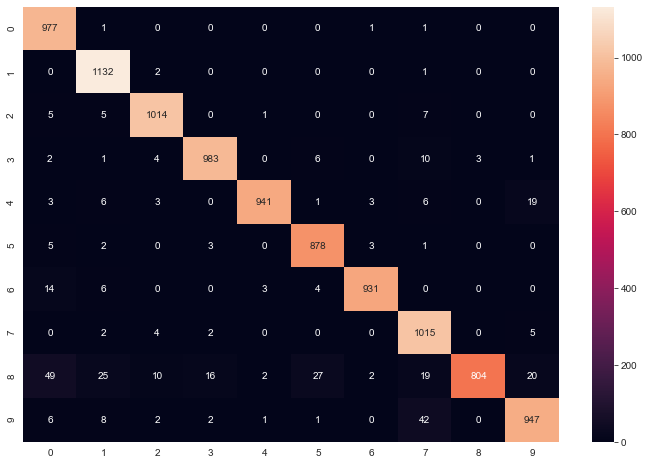

In [47]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(np.argmax(test_labels_cat, axis = 1), np.argmax(ypredict, axis =1))

plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(np.argmax(test_labels_cat, axis = 1), np.argmax(ypredict, axis =1)), annot=True, fmt='0.0f')